# Ion Switching - Exploratory Data Analysis

Key Information about this dataset from the competition sponsors:

> In this competition, you will be predicting the number of open_channels present, based on electrophysiological signal data.
> 
> IMPORTANT: While the time series appears continuous, the data is from discrete batches of 50 seconds long 10 kHz samples (500,000 rows per batch). In other words, the data from 0.0001 - 50.0000 is a different batch than 50.0001 - 100.0000, and thus discontinuous between 50.0000 and 50.0001.
> 
> You can find detailed information about the data from the paper Deep-Channel uses deep neural networks to detect single-molecule events from patch-clamp data.

### UPVOTE if you find this EDA helpful

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score, average_precision_score
from scipy import stats

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df_train = '/kaggle/input/liverpool-ion-switching/train.csv'
df_test = '/kaggle/input/liverpool-ion-switching/test.csv'
df_sample_submission = '/kaggle/input/liverpool-ion-switching/sample_submission.csv'

# Create dataframes
print(f'Reading csv from {df_train}...')
train = pd.read_csv(df_train)
print('...Complete')

# Create dataframes
print(f'Reading csv from {df_test}...')
test = pd.read_csv(df_test)
print('...Complete')

# Create dataframes
print(f'Reading csv from {df_sample_submission}...')
sample_submission = pd.read_csv(df_sample_submission)
print('...Complete')

## QWK Metric

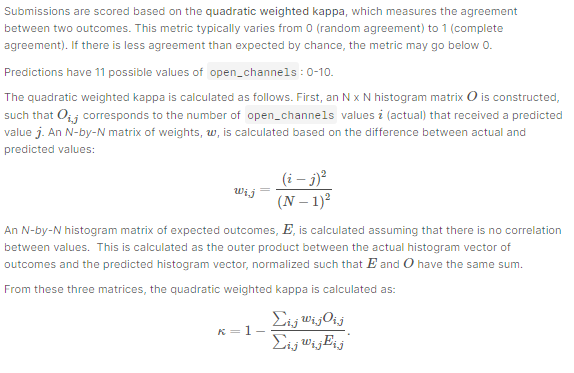

In [ ]:
def qwk(a1, a2):
    """
    Source: https://www.kaggle.com/c/data-science-bowl-2019/discussion/114133#latest-660168

    :param a1:
    :param a2:
    :param max_rat:
    :return:
    """
    max_rat = 10
    a1 = np.asarray(a1, dtype=int)
    a2 = np.asarray(a2, dtype=int)

    hist1 = np.zeros((max_rat + 1, ))
    hist2 = np.zeros((max_rat + 1, ))

    o = 0
    for k in range(a1.shape[0]):
        i, j = a1[k], a2[k]
        hist1[i] += 1
        hist2[j] += 1
        o +=  (i - j) * (i - j)

    e = 0
    for i in range(max_rat + 1):
        for j in range(max_rat + 1):
            e += hist1[i] * hist2[j] * (i - j) * (i - j)

    e = e / a1.shape[0]

    return 1 - o / e


## EDA

In [ ]:
train.head()

In [ ]:
train.tail()

In [ ]:
train.describe()

### Distribution between test and train signal data looks to be similar.

In [ ]:
train['signal'].plot(kind='hist',figsize=(20, 7),label='train', bins=10)
test['signal'].plot(kind='hist', figsize=(20, 7),label='test', bins=10)
plt.legend()
plt.show()

### Most Open Channels = 0 and trend downwards with the least numer of Open Channels = 10

In [ ]:
train['open_channels'].plot(kind='hist',figsize=(20, 7),label='train', bins=10)
plt.legend()
plt.show()

### Very fascinating trends in 'Signal' over time

In [ ]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=train,x='time',y ='signal', ax=ax)

### Most 'Open Channel' Activity (higher channel activity) occurring roughly around t=250 and t=475

In [ ]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=train,x='time',y ='open_channels', ax=ax)

### Distribution of 'Signals' shifts mean to the right as number of 'Open Channels' Increases

In [ ]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=train,x='signal',y ='open_channels', ax=ax)

### Stay Tuned for more...